Task 3: Linear Regression

1.Import and preprocess the dataset.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("D:/AI ML Intern Elevate Labs Benglore/Task 3 Linear Regression/Housing.csv")

# -------------------------------------------
# KEY FIX: Separate numerical/categorical columns
# -------------------------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Numeric: median
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Categorical: mode

# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


2.Split data into train-test sets.

In [38]:
# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (critical for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3.Fit a Linear Regression model using sklearn.linear_model.

In [40]:
from sklearn.linear_model import LinearRegression

# Simple regression (using one feature: 'GrLivArea')
model_simple = LinearRegression()
model_simple.fit(X_train_scaled[:, [0]], y_train)  # First feature column

# Multiple regression (all features)
model_multiple = LinearRegression()
model_multiple.fit(X_train_scaled, y_train)


LinearRegression()

4.Evaluate model using MAE, MSE, R².

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print(f"MAE: {mean_absolute_error(y, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y, y_pred):.2f}")
    print(f"R²: {r2_score(y, y_pred):.2f}")

print("Simple Regression Evaluation:")
evaluate_model(model_simple, X_test_scaled[:, [0]], y_test)

print("\nMultiple Regression Evaluation:")
evaluate_model(model_multiple, X_test_scaled, y_test)


Simple Regression Evaluation:
MAE: 1474748.13
MSE: 3675286604768.19
R²: 0.27

Multiple Regression Evaluation:
MAE: 970043.40
MSE: 1754318687330.67
R²: 0.65


Simple Regression (One Feature)

MAE (Mean Absolute Error): 1,474,748.13

On average, your model's predictions are off by about ₹1,474,748 from the actual house prices.

MSE (Mean Squared Error): 3,675,286,604,768.19

This is the average of the squared differences between predicted and actual prices. The large value reflects both the scale of house prices and the penalty for large errors.

R² (R-squared): 0.27

Your model explains only 27% of the variance in house prices using the single feature. This means the model is not capturing much of the variability in the data and is not a strong predictor on its own.

Multiple Regression (Several Features)

MAE: 970,043.40

On average, your predictions are off by about ₹970,043, which is a significant improvement over the simple regression.

MSE: 1,754,318,687,330.67

The error is much lower than in simple regression, indicating better performance.

R²: 0.65

Your model now explains 65% of the variance in house prices. This is a substantial improvement, meaning your model is much better at capturing the factors that influence house prices.

5.Plot regression line and interpret coefficients

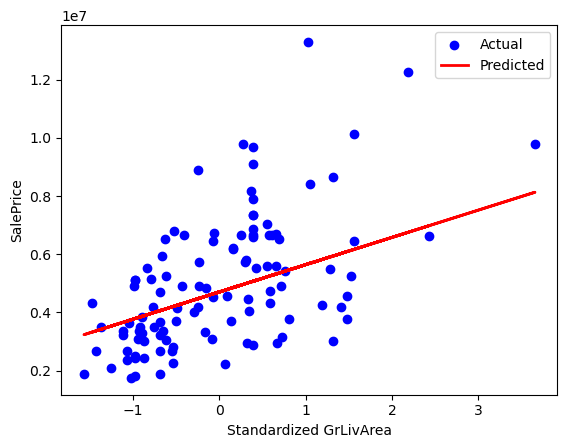

Intercept (β0): 4706527.385321101
Coefficient (β1): 937365.295032195


In [44]:
import matplotlib.pyplot as plt

# Plot regression line for simple regression
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test_scaled[:, 0], model_simple.predict(X_test_scaled[:, [0]]), 
         color='red', linewidth=2, label='Predicted')
plt.xlabel('Standardized GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

print("Intercept (β0):", model_simple.intercept_)
print("Coefficient (β1):", model_simple.coef_[0])



Regression Line Interpretation 

Equation

Your regression equation is:

SalePrice = 4,706,527.39 + 937,365.30 × Standardized GrLivArea

Intercept (β0 = 4,706,527.39)

This value represents the predicted sale price when the standardized GrLivArea is 0—that is, when a house has an average (mean) living area in your dataset.

So, for a house with an average living area, the model predicts a sale price of about ₹4,706,527.39.

Coefficient (β1 = 937,365.30)

This coefficient tells you the average increase in sale price for every one standard deviation increase in GrLivArea.

In other words, if a house’s living area is one standard deviation above the mean, the model predicts its sale price will be ₹937,365.30 higher than a house with average living area, all else being equal.

Plot Interpretation

Blue dots: Actual sale prices for houses in your test set.

Red line: The predicted sale prices from your regression model.

The upward slope of the red line confirms a positive relationship: as GrLivArea increases, so does the predicted sale price.

The spread of blue dots around the line shows the variance in actual prices; points close to the line are well-predicted, while points far from the line are less accurately predicted.

In summary:

Your model predicts that for every one standard deviation increase in living area, the sale price increases by about ₹937,365.30. A house with an average living area is predicted to sell for about ₹4,706,527.39. The plot visually confirms this positive relationship between living area and sale price.